In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
file_path = r"/Users/elvisechefu/Desktop/python 2/FOODFINNTASTIC.csv"
df = pd.read_csv("/Users/elvisechefu/Desktop/python 2/FOODFINNTASTIC.csv")
df.head(5)

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2023-09-20,Breakfast,421.5,13.7,2.7,0.1,0.0,0.0,0.0,38.3,422.4,62.0,5.4,20.9,16.5,5.0,17.1,0.6,1.7,NaN
1,2023-09-20,Dinner,767.0,27.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,0.0,0.0,50.6,0.0,0.0,0.0,0.0,NaN
2,2023-09-20,Lunch,1183.0,54.6,5.4,11.0,0.0,0.0,0.0,0.6,0.0,129.6,12.8,13.5,47.8,0.0,0.0,0.0,0.0,NaN
3,2023-09-20,Snacks,1242.8,67.5,14.0,0.0,0.0,0.3,12.2,128.0,684.4,73.9,6.6,27.3,91.3,0.0,116.2,316.0,15.1,NaN
4,2023-09-21,Breakfast,374.5,12.4,2.0,0.0,0.0,0.0,0.0,36.8,0.0,55.2,3.9,6.0,14.3,0.0,0.0,0.0,0.0,NaN


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
summed_data = df.groupby('Date').sum().reset_index()
print(summed_data)

         Date                        Meal  Calories  Fat (g)  Saturated Fat  \
0  2023-09-20  BreakfastDinnerLunchSnacks    3614.3    163.2           22.1   
1  2023-09-21  BreakfastDinnerLunchSnacks    3238.8    156.8           20.0   
2  2023-09-22  BreakfastDinnerLunchSnacks    3170.2    133.4           12.4   
3  2023-09-23  BreakfastDinnerLunchSnacks    3429.3     61.7            2.1   
4  2023-09-24  BreakfastDinnerLunchSnacks    3215.0    133.8           28.9   
5  2023-09-25  BreakfastDinnerLunchSnacks    3403.1    136.7           18.7   
6  2023-09-26  BreakfastDinnerLunchSnacks    2839.2    103.1           23.2   
7  2023-09-27  BreakfastDinnerLunchSnacks    3491.4    120.1           41.8   
8  2023-09-28  BreakfastDinnerLunchSnacks    3075.8    103.0           30.5   
9  2023-09-29  BreakfastDinnerLunchSnacks    3078.7    114.4           20.9   
10 2023-10-01  BreakfastDinnerLunchSnacks    3443.5    156.3           33.1   
11 2023-10-02  BreakfastDinnerLunchSnacks    2813.8 

In [3]:

file_path = r"/Users/elvisechefu/Desktop/python 2/FOODFINNTASTIC.csv"
df = pd.read_csv("/Users/elvisechefu/Desktop/python 2/FOODFINNTASTIC.csv")
df.head(5)
desired_category = 'Snacks'
fd_s = df[df['Meal'] == desired_category]
#print(fd_s)
desired_category = 'Breakfast'
fd_b = df[df['Meal'] == desired_category]
#print(fd_b)
desired_category = 'Lunch'
fd_l = df[df['Meal'] == desired_category]
#print(fd_l)
desired_category = 'Dinner'
fd_d = df[df['Meal'] == desired_category]
print(fd_d)


           Date    Meal  Calories  Fat (g)  Saturated Fat  \
1    2023-09-20  Dinner     767.0     27.4            0.0   
5    2023-09-21  Dinner     864.0     39.1            0.0   
9    2023-09-22  Dinner     950.0     51.7            0.0   
13   2023-09-23  Dinner    1000.0     20.0            0.0   
17   2023-09-24  Dinner     860.0     50.0           14.0   
21   2023-09-25  Dinner    1095.0     64.3            0.0   
25   2023-09-26  Dinner     842.0     37.0            0.0   
29   2023-09-27  Dinner     732.0     10.8           11.5   
33   2023-09-28  Dinner    1044.0     39.5           16.9   
37   2023-09-29  Dinner     804.7     42.3            1.5   
41   2023-10-01  Dinner     872.0     45.4           19.3   
45   2023-10-02  Dinner    1031.0     54.5            0.8   
49   2023-10-03  Dinner     956.0     27.7           14.3   
53   2023-10-04  Dinner     985.0     55.8            2.3   
57   2023-10-05  Dinner     767.0     23.0            0.0   
61   2023-10-06  Dinner 

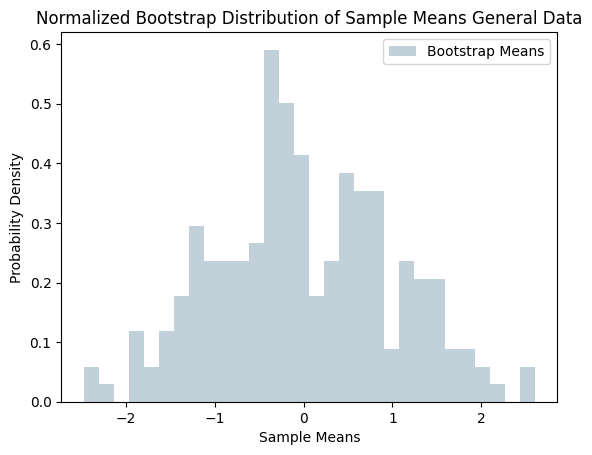

In [5]:
calories = df['Calories']
calories
data = (calories)
num_samples = 200
sample_size = len(calories)
bootstrap_means = []
for _ in range(num_samples):
    resampled_data = np.random.choice(calories, size=sample_size, replace=True)
    resampled_mean = np.mean(resampled_data)
    bootstrap_means.append(resampled_mean)
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
mean_value=np.mean(bootstrap_means)
std_value=np.std(bootstrap_means)
normalized_bootstrap =(bootstrap_means-mean_value)/std_value
hist, bins, _ = plt.hist(normalized_bootstrap, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means')
label=('Normalized Bootstrap Means')
label=('Original Mean')
plt.xlabel('Sample Means')
plt.ylabel('Probability Density')
plt.title('Normalized Bootstrap Distribution of Sample Means General Data')
plt.legend()
plt.show()


In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap General Data')
plt.show()

ValueError: could not convert string to float: '2023-09-20'